In [1]:
import pandas as pd
import datetime as dt
import yfinance as yf

In [2]:
# Define the time period and stock symbol
start = dt.datetime(2021, 6, 1)
end = dt.datetime(2022, 1, 5)
symbol = 'ZOMATO.NS'

# Download stock data
stk_data = yf.download(symbol, start=start, end=end)

[*********************100%***********************]  1 of 1 completed


In [3]:
# Selecting specific columns
stk_data = stk_data[["Open", "High", "Low", "Close"]]

In [4]:
stk_data 

Price,Open,High,Low,Close
Ticker,ZOMATO.NS,ZOMATO.NS,ZOMATO.NS,ZOMATO.NS
Date,,,,
2021-07-23,116.000000,138.899994,115.000000,126.000000
2021-07-26,126.349998,143.750000,125.300003,140.649994
2021-07-27,141.699997,147.800003,127.750000,132.899994
2021-07-28,131.000000,135.000000,123.550003,131.199997
2021-07-29,134.949997,144.000000,132.199997,141.550003
...,...,...,...,...
2021-12-29,132.699997,137.699997,131.550003,137.100006
2021-12-30,137.050003,137.050003,133.300003,133.949997


In [5]:
 # Adjust to your column names
new_headers = ['Open','High','Low','Close'] 
stk_data.columns = new_headers

In [6]:
stk_data

,Open,High,Low,Close
Date,,,,
2021-07-23,116.000000,138.899994,115.000000,126.000000
2021-07-26,126.349998,143.750000,125.300003,140.649994
2021-07-27,141.699997,147.800003,127.750000,132.899994
2021-07-28,131.000000,135.000000,123.550003,131.199997
2021-07-29,134.949997,144.000000,132.199997,141.550003
...,...,...,...,...
2021-12-29,132.699997,137.699997,131.550003,137.100006
2021-12-30,137.050003,137.050003,133.300003,133.949997
2021-12-31,133.850006,138.399994,133.399994,137.399994


In [7]:
stk_data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 113 entries, 2021-07-23 to 2022-01-04
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Open    113 non-null    float64
 1   High    113 non-null    float64
 2   Low     113 non-null    float64
 3   Close   113 non-null    float64
dtypes: float64(4)
memory usage: 4.4 KB


In [8]:
column="Close"

In [9]:
from sklearn.preprocessing import MinMaxScaler
Ms = MinMaxScaler()
data1= Ms.fit_transform(stk_data[[column]])
print("Len:",data1.shape)

Len: (113, 1)


In [10]:
len(data1)

113

In [11]:
training_size = round(len(data1 ) * 0.95)
print(training_size)
X_train=data1[:training_size]
X_test=data1[training_size:]
print("X_train length:",X_train.shape)
print("X_test length:",X_test.shape)
y_train=data1[:training_size]
y_test=data1[training_size:]
print("y_train length:",y_train.shape)
print("y_test length:",y_test.shape)

107
X_train length: (107, 1)
X_test length: (6, 1)
y_train length: (107, 1)
y_test length: (6, 1)


In [12]:
"""from statsmodels.tsa.arima.model import ARIMA
model = ARIMA(data1, order=(1,1,1))#Autoregressive Integrated Moving Average (ARIMA)
model_fit = model.fit()
# make prediction
y_pred= model_fit.predict(len(stk_data), len(stk_data)-1)
print(y_pred)
from stockFunctions import rmsemape
rmsemape(stkk,predicted_stock_price_test_oriP["Open"])"""

'from statsmodels.tsa.arima.model import ARIMA\nmodel = ARIMA(data1, order=(1,1,1))#Autoregressive Integrated Moving Average (ARIMA)\nmodel_fit = model.fit()\n# make prediction\ny_pred= model_fit.predict(len(stk_data), len(stk_data)-1)\nprint(y_pred)\nfrom stockFunctions import rmsemape\nrmsemape(stkk,predicted_stock_price_test_oriP["Open"])'

In [13]:
import warnings
warnings.filterwarnings("ignore")

In [15]:
orders=[(0,0,0),(0,0,1),(2,0,1),(1,1,1)]
#orderslist=[]
#rscorelist=[]
for i in orders:
    #orderslist.append(i)
    from statsmodels.tsa.statespace.sarimax import SARIMAX
    model = SARIMAX(data1, order=i, seasonal_order=(0,0,0,12))
    model_fit = model.fit()
    # make prediction
    y_pred= model_fit.predict(0, len(data1)-1)
    #print(y_pred)
    from stockFunctions import rmsemape
    rmsemape(data1,y_pred)
    

RMSE-Testset: 0.44492866766477174
maPe-Testset: 0.9911504424778761
RMSE-Testset: 0.2700124622150744
maPe-Testset: 5202482094025.297
RMSE-Testset: 0.12867482499476207
maPe-Testset: 788255236624.9587
RMSE-Testset: 0.12584369717628333
maPe-Testset: 2217399625148.2637


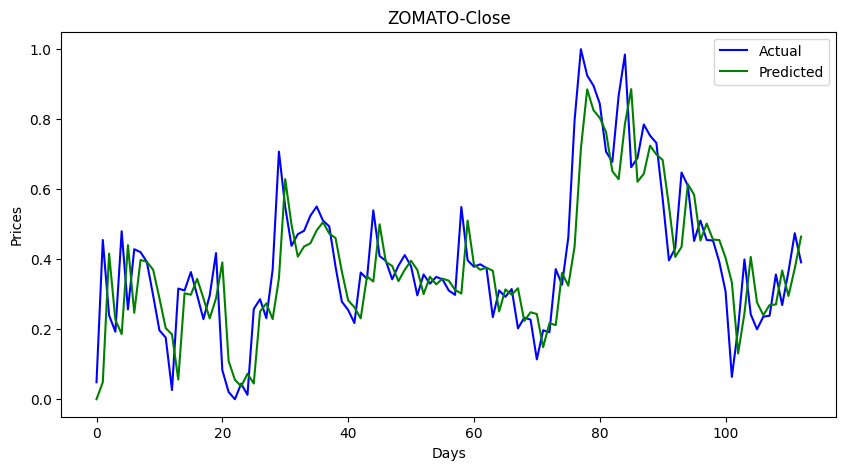

In [16]:
from stockFunctions import graph
graph(data1,y_pred,"Actual","Predicted","ZOMATO-Close","Days","Prices")

In [17]:
len(data1)

113

In [18]:
from stockFunctions import conversionSingle
aTestNormTable=conversionSingle(data1,["Close"])
actual_stock_price_test_ori=Ms.inverse_transform(aTestNormTable)
actual_stock_price_test_oriA=conversionSingle(actual_stock_price_test_ori,["Close"])

In [19]:
from stockFunctions import conversionSingle
pTestNormTable=conversionSingle(y_pred,["Close"])
predicted_stock_price_test_ori=Ms.inverse_transform(pTestNormTable)
predicted_stock_price_test_oriP=conversionSingle(predicted_stock_price_test_ori,["Close"])

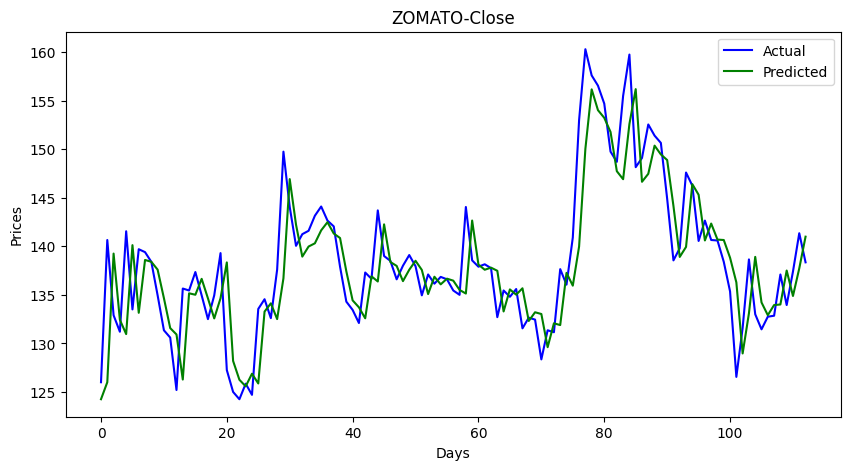

In [20]:
from stockFunctions import graph
graph(actual_stock_price_test_oriA,predicted_stock_price_test_oriP,"Actual","Predicted","ZOMATO-Close","Days","Prices")

In [21]:
from stockFunctions import rmsemape
rmsemape(actual_stock_price_test_oriA,predicted_stock_price_test_oriP)

RMSE-Testset: 4.536665667249499
maPe-Testset: 0.02357261479781074


In [22]:
forecast=model_fit.predict(len(data1), len(data1)+3)

In [23]:
forecast

array([0.3956376 , 0.39927902, 0.40221652, 0.40458618])

In [24]:
from stockFunctions import conversionSingle
fTestNormTable=conversionSingle(forecast,["Closefore"])
forecast_stock_price_test_ori=Ms.inverse_transform(fTestNormTable)
forecast_stock_price_test_oriF=conversionSingle(forecast_stock_price_test_ori,["Closefore"])

In [25]:
forecast_stock_price_test_oriF.to_csv("Closets.csv",index=False)

In [26]:
forecast_stock_price_test_oriF

,Closefore
0,138.512737
1,138.64401
2,138.749907
3,138.835333
